# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [1]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [2]:
L=0.5
Rw=0.3

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

In [3]:
def draw_wheelchair(x, y, theta):
    # Define the dimensions of the wheelchair
    
    wheel_distance = 0.5
    

    # Define the coordinates of the four corners of the seat
    seat_corners = np.array([[x + L/2, y + L/2],
                             [x - L/2, y + L/2],
                             [x - L/2, y - L/2],
                             [x + L/2, y - L/2]])
    
    # Define the coordinates of the centers of the two wheels
    wheel_centers = np.array([[x - wheel_distance/2*np.cos(theta), y - wheel_distance/2*np.sin(theta)],
                              [x + wheel_distance/2*np.cos(theta), y + wheel_distance/2*np.sin(theta)]])
    
    # Plot the wheelchair
    fig, ax = plt.subplots()
    ax.plot(seat_corners[:,0], seat_corners[:,1], 'b-', linewidth=2)
    for center in wheel_centers:
        circle = plt.Circle(center, Rw, color='r')
        ax.add_artist(circle)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([x-2, x+2])
    ax.set_ylim([y-2, y+2])
    plt.grid()
    plt.show()

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [4]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

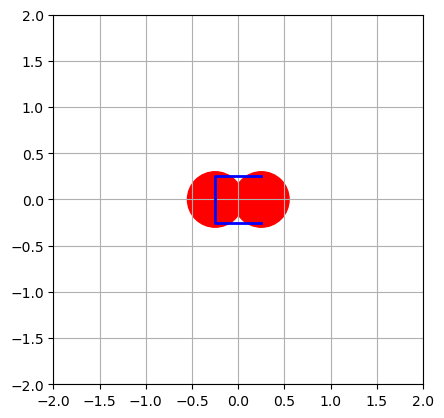

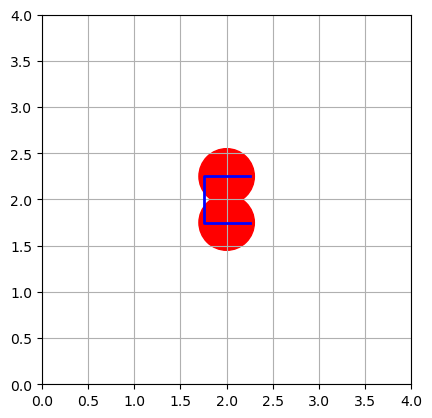

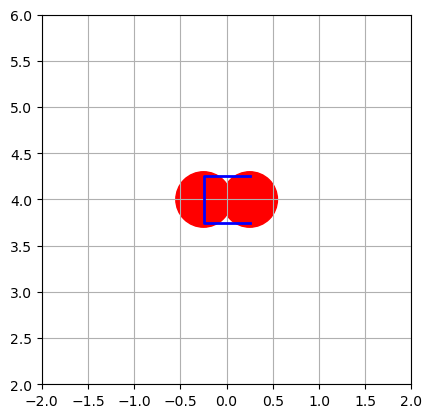

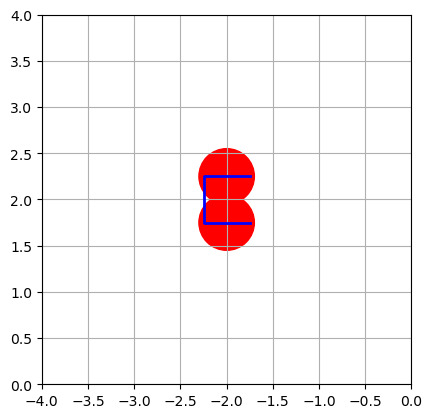

In [5]:


# Draw two wheelchairs on the same figure
draw_wheelchair(0, 0, 0)
draw_wheelchair(2, 2, pi/2)
draw_wheelchair(0, 4, pi)
draw_wheelchair(-2, 2, 3*pi/2)
# Show the plot
plt.show()

<div style=color:red>
    
**Vos graphes ne vont vraiment pas :**
  
  - Vos roues devraient avoir l'impression d'être vues de haut. On devrait dond dessiner un trait (un peu plus épais pour le différencier du cadre. On ne doit pas avoir de cercle (les centres de vos cercles devraient d'ailleurs être alignés avec l'arrière du siège). 
    
  - Les coordonnées $x,y$ devraient correspondre au centre du dossier et non du cadre. 
    
  - Enfin, votre cadre n'est pas dessiné entièrement.
</div>

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:** $$\dot{x}=\frac{r_w}{2}(\omega_l+\omega_r)\cos(\theta)$$

$$\dot{y}=\frac{r_w}{2}(\omega_l+\omega_r)\sin(\theta)$$

$$\dot{\theta}=\frac{r_w}{L}(\omega_r-\omega_l)$$
Ceci parceque: $v=\frac{r_w}{2}(\omega_r+\omega_l)$ avec v est la vitesse lineaire et $\omega=\frac{r_w}{L}(\omega_r-\omega_l)$

<span style=color:red>**La partie $\omega=\frac{r_w}{L}(\omega_r-\omega_l)$ aurait mérité quelques explications....**</span>

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:** En modélisant ce problème à l'aide d'un champ de vecteurs, la condition initiale est représentée par un vecteur du champ. Étant donné que ce champ de vecteurs est continûment différentiable, il existe une solution unique pour ce problème de valeur initiale. Par conséquent, le système est bien posé.

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:** Si les forces et les données impliquées dans le système ne changent pas avec le temps, alors les taux de variation de x, y et 𝜃 par rapport au temps (les dérivées) sont bornés et ne peuvent pas atteindre des valeurs infinies. Par conséquent, la trajectoire suivie par les variables x, y et 𝜃 est valable pour tout instant t, et la solution maximale est globale.

Cependant, si les données du système dépendent des variables x, y et 𝜃, il est possible que la variation de ces variables avec le temps puisse atteindre des valeurs infinies pour certaines valeurs initiales. Dans ce cas, la solution ne peut être considérée que pour une région locale du temps et de l'espace, plutôt que pour l'ensemble du système.

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [ ]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [ ]:
def fun(t, xytheta):
    pass

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [ ]:
pass

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

In [ ]:
pass

🧩 Use the simulation results to display the robot location every 0.5 second.

In [ ]:
pass

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [ ]:
pass

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

In [ ]:
pass